In [1]:
import numpy as np

from sdf import *

/home/yann/code/3d/3dprints/deps/sdf/sdf/d3.py:847: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  matrix = np.array(


min -65.2596, -74.5825, -94.0944
max 71.4749, 74.5825, 63.6037
step 1.45297, 1.45297, 1.45297
1151584 samples in 48 batches with 16 workers
  100% (48 of 48) [##############################] 0:00:17 0:00:00    
11 skipped, 9 empty, 28 nonempty
50268 triangles in 18.617 seconds
Saved mesh to 'out.stl'


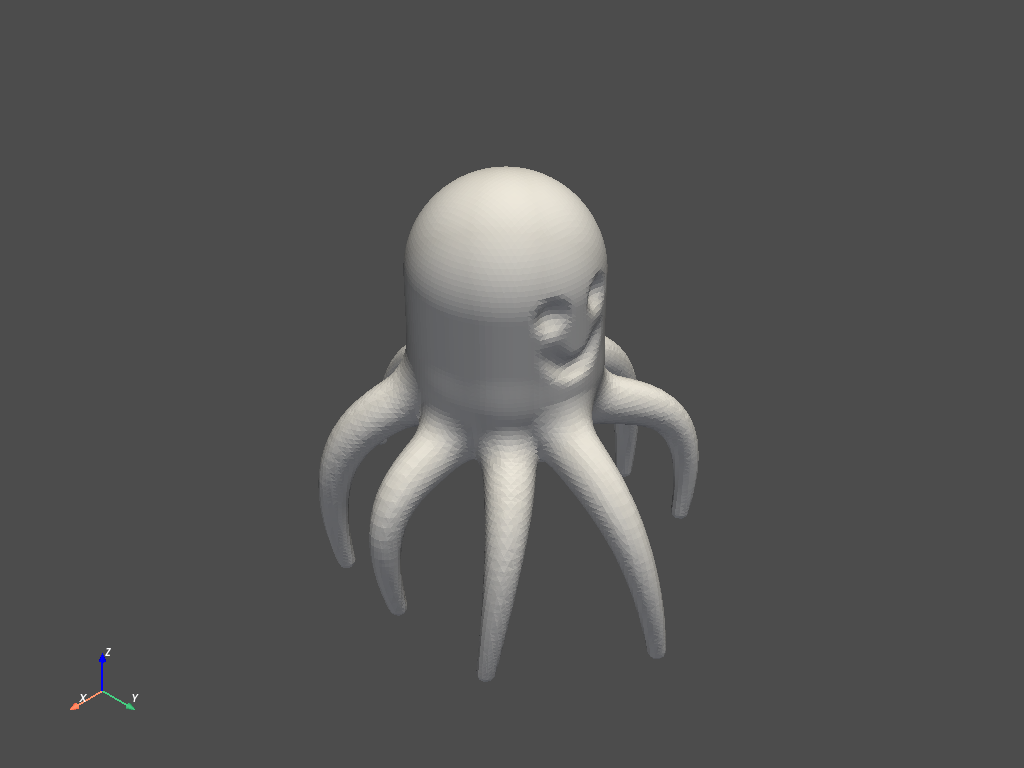

In [2]:
octopus = capsule(ORIGIN, 30 * Z, radius=30)
tentacles = union(
    *[
        bezier(
            ORIGIN,
            -np.random.uniform(20, 40) * Z,
            np.random.uniform(20, 50) * X + np.random.uniform(20, 50) * Y,
            -np.random.uniform(60, 80) * Z
            + np.random.uniform(20, 40) * X
            + np.random.uniform(20, 40) * Y,
            radius=ease.in_out_cubic.reverse.between(10, 3),
        )
        .translate(10 * (X + Y))
        .rotate(units("360°") / 8 * i, Z)
        for i in range(8)
    ]
)
octopus |= tentacles.k(10)
mouth = torus(10, 3).orient(Y) & slab(z1=-1).k(5)
eyes = (e := sphere(5).translate(10 * X)) | e.mirror(-X)
octopus -= mouth.translate(30 * Y + 20 * Z).k(3)
octopus -= eyes.translate(30 * Y + 30 * Z).k(3)
octopus.save(samples=2**20)